In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
optimizer = RMSprop(learning_rate=0.001)

In [34]:
img = image.load_img(r'C:\Users\Admin\Desktop\Training\Happy\IMG_20220910_201638.jpg')

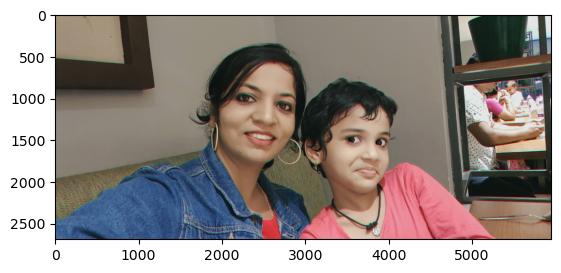

In [35]:
plt.imshow(img)

In [37]:
i1 = cv2.imread(r'C:\Users\Admin\Desktop\Training\Happy\IMG_20220910_201638.jpg')
i1

array([[[122, 148, 162],
        [122, 148, 162],
        [121, 147, 161],
        ...,
        [228, 231, 229],
        [228, 231, 229],
        [228, 231, 229]],

       [[122, 148, 162],
        [122, 148, 162],
        [121, 147, 161],
        ...,
        [228, 231, 229],
        [228, 231, 229],
        [228, 231, 229]],

       [[123, 149, 163],
        [122, 148, 162],
        [122, 148, 162],
        ...,
        [228, 231, 229],
        [228, 231, 229],
        [228, 231, 229]],

       ...,

       [[155, 123,  70],
        [155, 123,  70],
        [156, 125,  70],
        ...,
        [ 98, 130, 166],
        [ 97, 129, 165],
        [ 96, 128, 164]],

       [[152, 120,  67],
        [152, 120,  67],
        [153, 122,  67],
        ...,
        [ 99, 131, 167],
        [ 98, 130, 166],
        [ 97, 129, 165]],

       [[150, 118,  65],
        [150, 119,  64],
        [151, 120,  65],
        ...,
        [ 99, 131, 167],
        [ 98, 130, 166],
        [ 98, 130, 166]]

In [38]:
i1.shape

(2688, 5951, 3)

In [46]:
train = ImageDataGenerator(rescale= 1/200)
validation = ImageDataGenerator(rescale = 1/200)

In [47]:
train_dataset = train.flow_from_directory(r'C:\Users\Admin\Desktop\Training',
                                          target_size = (200,200),
                                         batch_size = 32,
                                         class_mode = 'binary')
validation_dataset =  validation.flow_from_directory(r'C:\Users\Admin\Desktop\Validations',
                                          target_size = (200,200),
                                         batch_size = 32,
                                         class_mode = 'binary')

Found 10 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [41]:
train_dataset.class_indices

{'Happy': 0, 'Not Happy': 1}

In [42]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [43]:
# now we are applying maxpooling 

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ]
                                    )

In [44]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [45]:
model_fit = model.fit(train_dataset, epochs = 15)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4000 - loss: 0.7163
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7000 - loss: 13.2246
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3000 - loss: 3.9538
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7000 - loss: 1.0218
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9000 - loss: 0.5003
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8000 - loss: 0.4004
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9000 - loss: 0.2956
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9000 - loss: 0.2022
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9000 - loss: 0.4661
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7000 - loss: 1.7080
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.2576
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1758
Epoch 13/15
1/1 ━━━━━━━━

In [31]:
dir_path = r'C:\Users\Admin\Desktop\Testing'
for i in os.listdir(dir_path ):
    print(i)

20241004_224946.jpg
20250523_011858.jpg
20250523_013009.jpg
IMG-20220608-WA0050.jpg
IMG_20220602_212350.jpg
IMG_20220910_201638.jpg
IMG_20230325_113921.jpg
IMG_20230421_183336~2.jpg
IMG_20230609_140456.jpg
IMG_6189.JPG


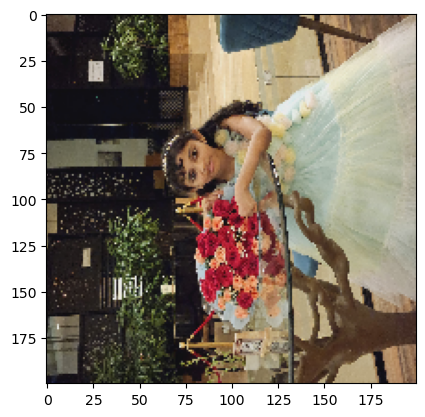

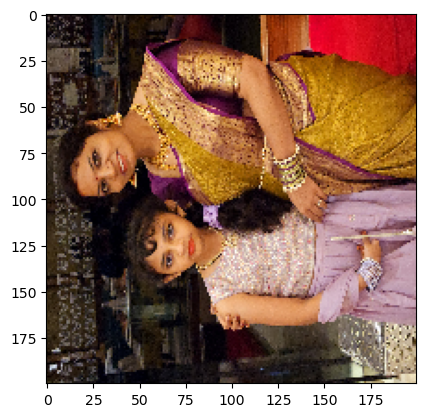

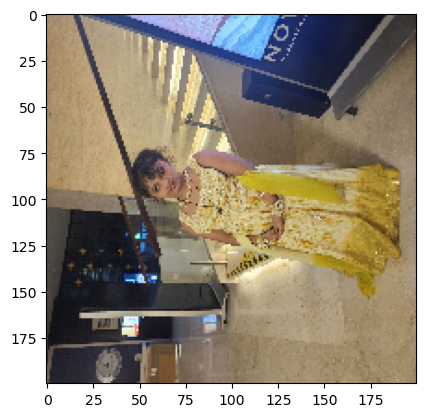

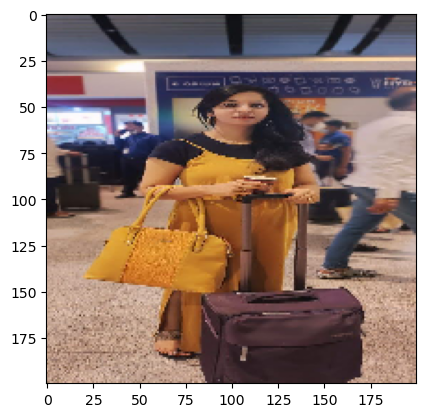

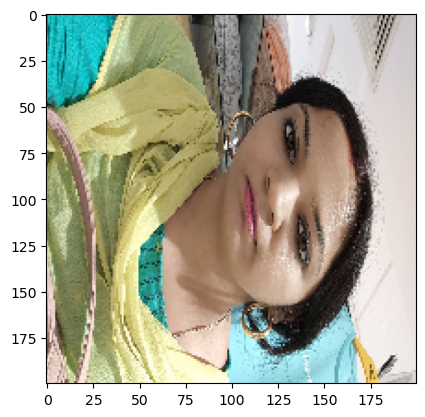

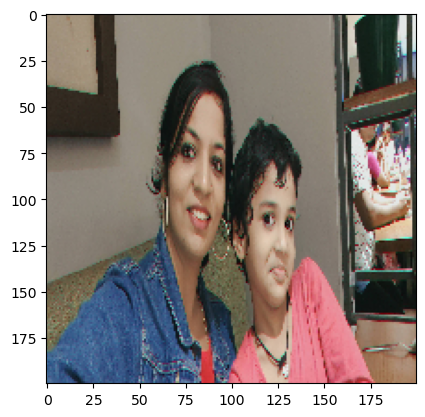

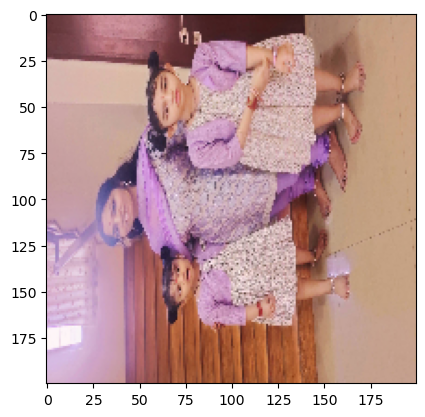

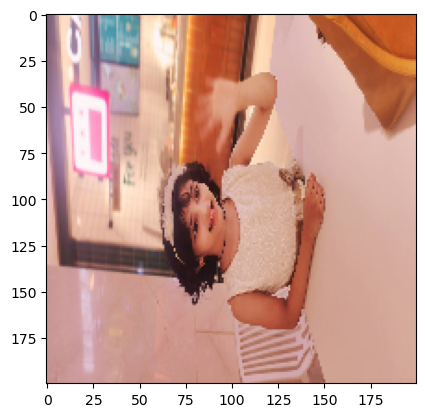

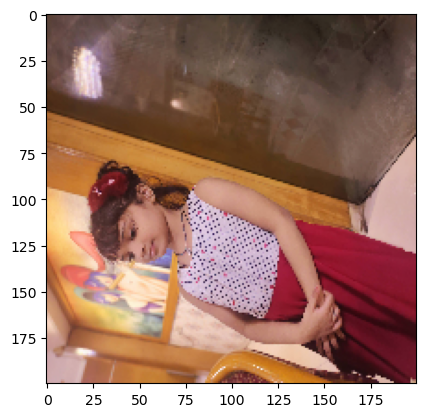

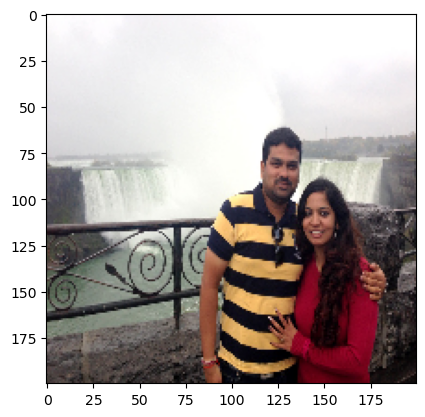

In [48]:
dir_path = r'C:\Users\Admin\Desktop\Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

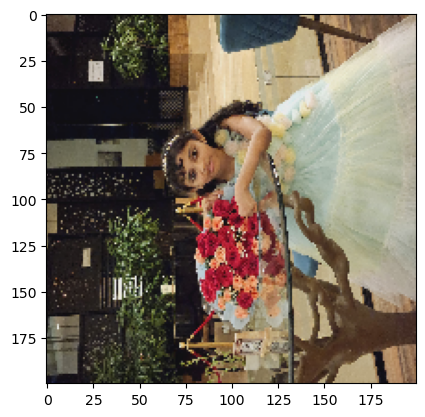

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


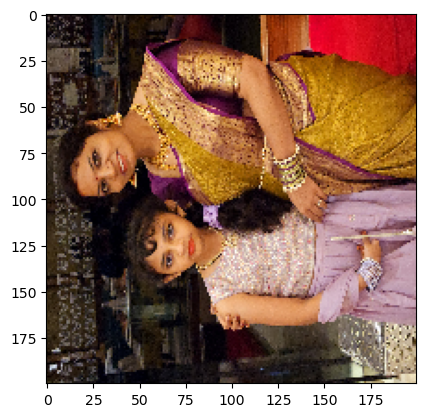

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


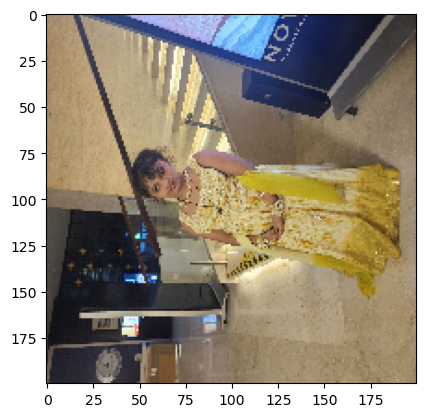

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


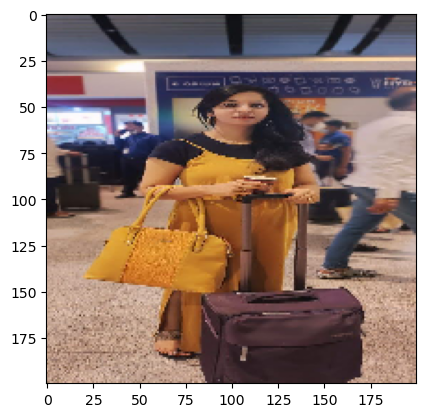

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


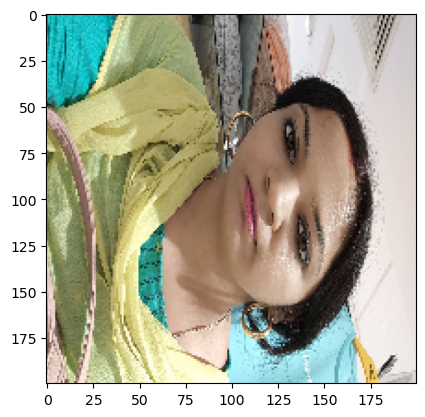

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


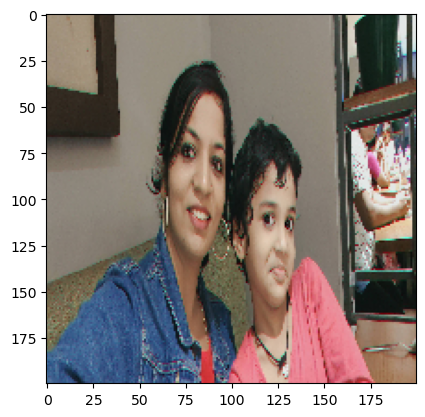

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


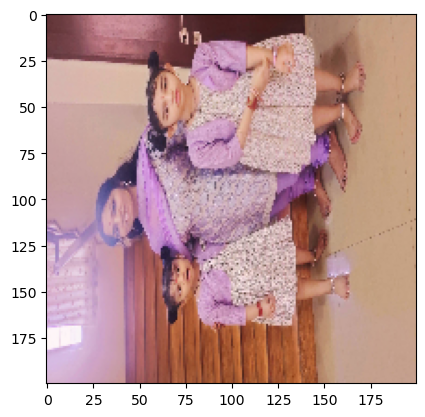

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


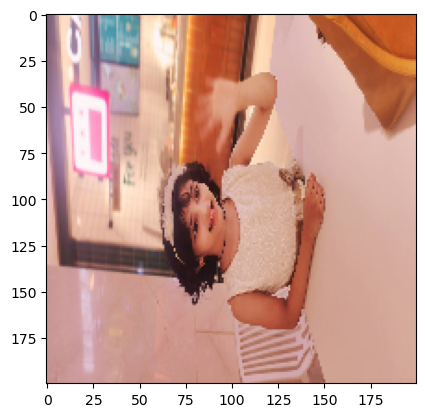

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


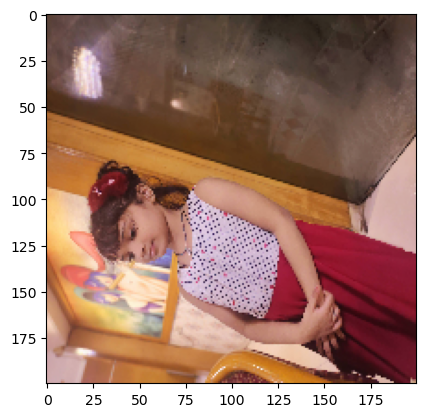

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


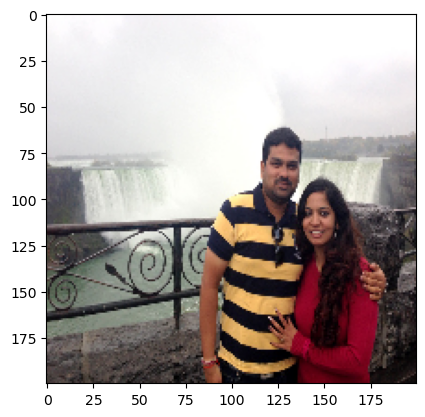

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
i am not happy


In [33]:
dir_path = r'C:\Users\Admin\Desktop\Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
   
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
if val == 0:
        print('i am happy')
else:
        print('i am not happy')

In [16]:
model.save("happy_not_happy_model.h5")